## Final Project - RFM Analysis

### Activities

In this project you will implement RFM analysis for analysing customers based on three factors: Recency, Frequency, and Monetary Value.

You will remove outliers from the dataset and apply K-means clustering to create clusters of customers exhibiting similar purchase behaviour.

---

#### Customer Segmentation Problem Statement


We have a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments

The dataset consists of the following attributes:

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`

- `UnitPrice`: Unit price. Numeric, Product price per unit in pound sterling, also known as GBP (Great Britain Pound).

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.



**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


---

#### Loading the Dataset





**Dataset Link:** https://raw.githubusercontent.com/m-narayanan22/datasets/main/online-retail-customers.xlsx



In [ ]:
# Read the dataset and create a Pandas DataFrame.
import pandas as pd
transactional_data = pd.read_excel("https://raw.githubusercontent.com/m-narayanan22/datasets/main/online-retail-customers.xlsx")
transactional_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
print(f'Number of rows and colmns are : {transactional_data.shape}')
transactional_data.info()

Number of rows and colmns are : (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---

#### Removing the Cancelled Orders



In [ ]:
# Check the data type of 'InvoiceNo' field
type(transactional_data['InvoiceNo'].dtype)

numpy.dtype[object_]

In [ ]:
# Convert 'InvoiceNo' field to string and verify whether the data type is converted or not.
transactional_data = transactional_data.astype({'InvoiceNo': 'string'})
type(transactional_data['InvoiceNo'].dtype) # converted from object into string.

pandas.core.arrays.string_.StringDtype

In [ ]:
# Use regex to find 'C' in the 'InvoiceNo' field
transactional_data[transactional_data.InvoiceNo.str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
transactional_data[transactional_data.InvoiceNo.str.contains('C')].value_counts().sum()

8905

In [ ]:
# Check total number of orders including cancelled orders.
transactional_data['InvoiceNo'].value_counts().sum()

541909

In [ ]:
# Remove cancelled invoices from the dataset
correct_transactional_data = transactional_data[transactional_data['Quantity']>0]

In [ ]:
correct_transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  string        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), string(1)
memory usage: 36.5+ MB


---

#### Removing Missing Values

In [ ]:
# Obtain the number of missing or null values in df
correct_transactional_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [ ]:
# Determine the percentage of null values in each column.
percentage_of_null=correct_transactional_data.isnull().sum()*100/len(correct_transactional_data)
percentage_of_null

InvoiceNo       0.000000
StockCode       0.000000
Description     0.111428
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.101593
Country         0.000000
dtype: float64

In [ ]:
# Remove the null valued rows.
correct_transactional_data = correct_transactional_data.dropna()

In [ ]:
# Again obtain the number of null values in df.
correct_transactional_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Check the data type of CustomerID column.
type(correct_transactional_data['CustomerID'].dtype)

numpy.dtype[float64]

In [ ]:
# Convert 'CustomerID' field to integer based categorical column.
correct_transactional_data = correct_transactional_data.astype({'CustomerID': 'int'})
type(correct_transactional_data['CustomerID'].dtype) # converted from object into string.

numpy.dtype[int64]

---

#### RFM analysis



In [ ]:
# S3.1: Check the first 5 samples of the dataframe
correct_transactional_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Obtain the the total purchase amount for the customers
correct_transactional_data['UnitPrice'].sum()

1240000.614

In [ ]:
# Obtain the number of unique customers
correct_transactional_data['CustomerID'].unique().tolist()

[17850,
 13047,
 12583,
 13748,
 15100,
 15291,
 14688,
 17809,
 15311,
 16098,
 18074,
 17420,
 16029,
 16250,
 12431,
 17511,
 13705,
 13747,
 13408,
 13767,
 17924,
 13448,
 15862,
 15513,
 12791,
 16218,
 14045,
 14307,
 17908,
 17920,
 12838,
 13255,
 16583,
 18085,
 13758,
 13694,
 15983,
 14849,
 17968,
 16210,
 17897,
 17377,
 16552,
 17181,
 17951,
 14729,
 12748,
 15012,
 12868,
 17572,
 14078,
 14001,
 12662,
 15525,
 14237,
 17905,
 15485,
 12433,
 16955,
 15350,
 15605,
 18144,
 15922,
 14594,
 15165,
 14911,
 16456,
 17346,
 17643,
 17841,
 17873,
 13093,
 12921,
 13468,
 17760,
 16928,
 16048,
 16274,
 14496,
 14696,
 16539,
 17025,
 13777,
 17690,
 12947,
 17460,
 18229,
 14142,
 17069,
 13065,
 14606,
 16835,
 15235,
 13576,
 18011,
 13090,
 15694,
 14741,
 13715,
 17732,
 12855,
 15752,
 17855,
 14047,
 17925,
 13941,
 17017,
 14135,
 13108,
 15601,
 13418,
 15658,
 14388,
 14901,
 18041,
 15955,
 15070,
 16244,
 15111,
 14390,
 16546,
 15260,
 13305,
 14491,
 14060,


In [ ]:
# Obtain the Monetary information from the dataframe
import warnings
warnings.filterwarnings('ignore')
correct_transactional_data['Totalcost'] = correct_transactional_data['Quantity']*correct_transactional_data['UnitPrice']
Monetary_info = correct_transactional_data.groupby(by='CustomerID',as_index=False).agg({'Totalcost': 'sum'})
Monetary_info.columns = ['CustomerID','monetary']
Monetary_info.head()

,CustomerID,monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [ ]:
# Obtain the Frequency information from the dataframe
freqency_info = correct_transactional_data.groupby('CustomerID')['InvoiceNo'].count()
freqency_info = freqency_info.reset_index()
freqency_info.columns =['CustomerID','frequency']
freqency_info.head()

,CustomerID,frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


---

#### Merging DataFrames



In [ ]:
# Merge 'monetary_df' and 'frequency_df' dataframes.
mon_freq_mereged_df = pd.merge(Monetary_info,freqency_info)
mon_freq_mereged_df.head()

,CustomerID,monetary,frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


---

#### Calculating Recency


In [ ]:
# Obtain the last purchase date for each customer
correct_transactional_data.groupby('CustomerID')['InvoiceDate'].max()

CustomerID
12346   2011-01-18 10:01:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-12-02 11:43:00
18283   2011-12-06 12:02:00
18287   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4339, dtype: datetime64[ns]

In [ ]:
# Obtain the last invoice date in the dataset.
Present_date = correct_transactional_data['InvoiceDate'].max()
Present_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Obtain the present date i.e LastPurchaseDate + 1 day
from datetime import timedelta
present_date = correct_transactional_data['InvoiceDate'].max() + timedelta(days = 1)
present_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
# Obtain the days since last purchase made by a customer
dt_name_series = correct_transactional_data.groupby('CustomerID')['InvoiceDate'].max().dt.day_name()
dt_name_series

CustomerID
12346      Tuesday
12347    Wednesday
12348       Sunday
12349       Monday
12350    Wednesday
           ...    
18280       Monday
18281       Sunday
18282       Friday
18283      Tuesday
18287       Friday
Name: InvoiceDate, Length: 4339, dtype: object

In [ ]:
# Extract days from datetime using 'dt.days' attribute
dt_days = correct_transactional_data['InvoiceDate'].dt.day_name()
dt_days

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: InvoiceDate, Length: 397924, dtype: object

In [ ]:
# Add 'recency_days' as column to the merged dataframe 'rfm_df'.
recency_days = correct_transactional_data.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_days.columns = ['CustomerID','LastPurshaceDate']
recency_days['recency'] = recency_days['LastPurshaceDate'].apply(lambda x: (Present_date - x).days)
recency_days.head()

,CustomerID,LastPurshaceDate,recency
0,12346,2011-01-18 10:01:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309


You now have a dataframe for RFM analysis consisting of the necessary fields to carry out the customer segmentation.

Now analyse the `rfm_df` dataframe obtained after RFM analysis and prepare it for K-Means clustering.



---

#### Data Analysis

For clustering, the `CustomerID` field is not required hence it can be dropped form the `rfm_df` dataframe.

In [ ]:
rfm_df = pd.merge(mon_freq_mereged_df,recency_days, on ='CustomerID', how='inner' )
rfm_df

,CustomerID,monetary,frequency,LastPurshaceDate,recency
0,12346,77183.60,1,2011-01-18 10:01:00,325
1,12347,4310.00,182,2011-12-07 15:52:00,1
2,12348,1797.24,31,2011-09-25 13:13:00,74
3,12349,1757.55,73,2011-11-21 09:51:00,18
4,12350,334.40,17,2011-02-02 16:01:00,309
...,...,...,...,...,...
4334,18280,180.60,10,2011-03-07 09:52:00,277
4335,18281,80.82,7,2011-06-12 10:53:00,180
4336,18282,178.05,12,2011-12-02 11:43:00,7
4337,18283,2094.88,756,2011-12-06 12:02:00,3


In [ ]:
# Drop the 'CustomerIDl column
rfm_dff=rfm_df.drop(columns=['CustomerID','LastPurshaceDate'], axis = 1)
rfm_dff

,monetary,frequency,recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4334,180.60,10,277
4335,80.82,7,180
4336,178.05,12,7
4337,2094.88,756,3


Create histogram and boxplots to understand the distribution of `Monetary`, `Frequency`, and `Recency` columns.

Use `subplots()` function of `matplotlib.pyplot` module to display all the three histograms in the first row and the boxplots in the second row.

Follow the steps given below to create this subplot:
1. Call the `subplots()` function on an object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `subplots()` function, pass:

  - `nrows = 2` and `ncols = 3` parameters to create a figure having 2 rows and 3 columns.

  - `figsize = (15, 5)` parameter to create the figure of 15 units wide and 5 units high.

  - `dpi = 100` parameter to further enlarge the figure based on their pixel density.

2. Construct a histogram to visualise the distribution of `Monetary` column using first row, first column subplot's axes i.e `axis[0, 0]`.

3. Construct a boxplot to visualise the distribution of `Monetary` column using second row, first column subplot's axes i.e `axis[1, 0]`.

4. Also call the `set_title()` function using the `axis[0, 0]` object to set the `title` for histogram and boxplot.

5. Similarly, construct histograms and boxplots for `Frequency` and `Recency` columns using the respective subplots's axes.

6. Call the `show()` function on the `matplotlib.pyplot` object.


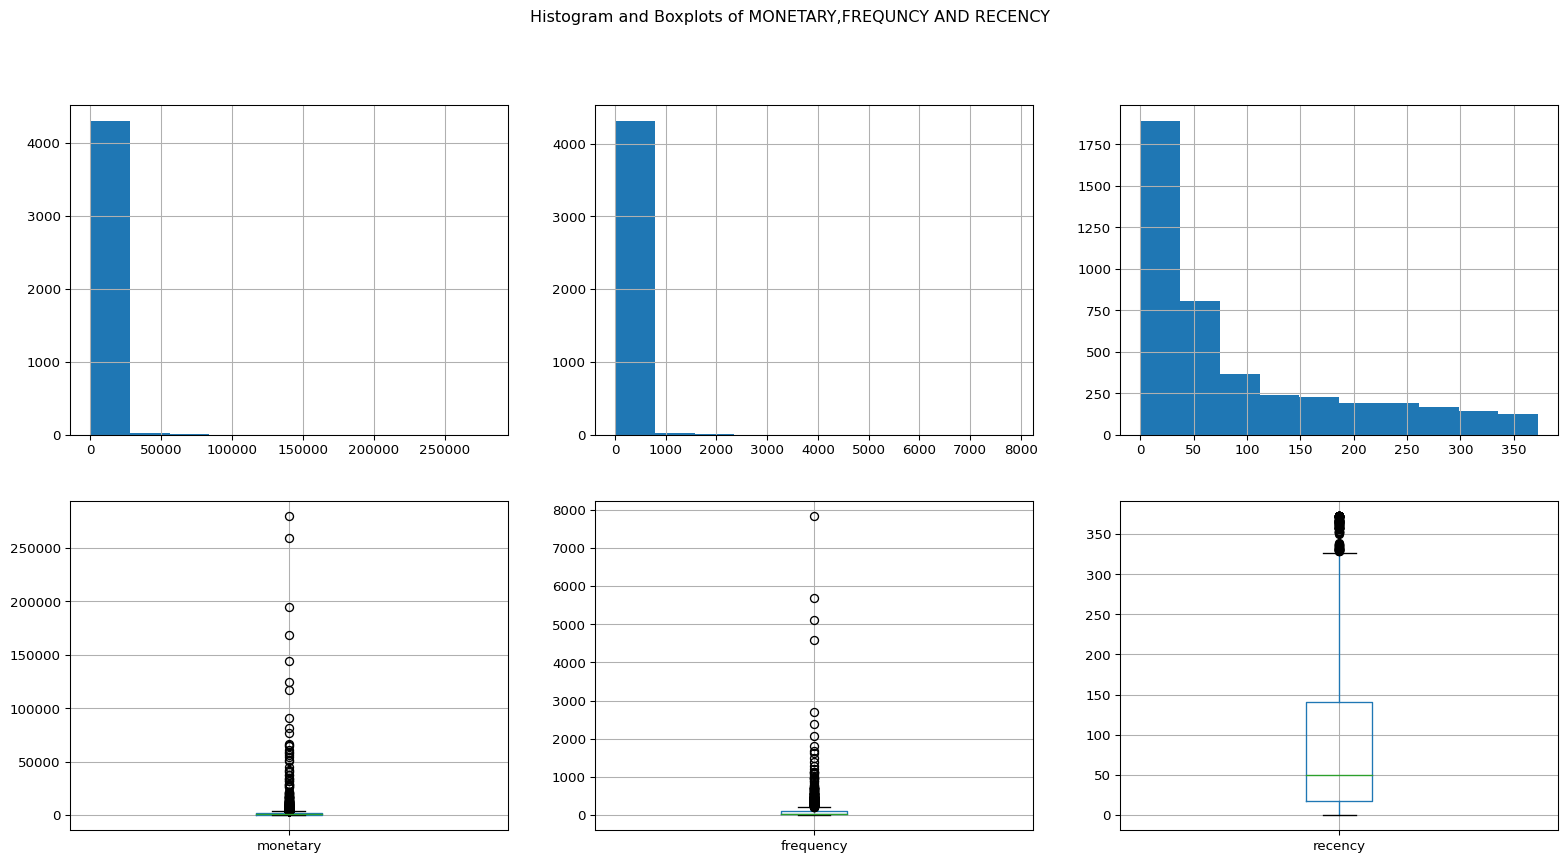

In [ ]:
# Obtain the histogram and boxplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), dpi = 96, sharey = False)
# Construct Histogram and Boxplot for 'Monetary'
rfm_dff['monetary'].hist(ax=axes[0,0])
rfm_dff.boxplot(column='monetary',ax=axes[1,0])
# Construct Histogram and Boxplot for 'Frequency'
rfm_dff['frequency'].hist(ax=axes[0,1])
rfm_dff.boxplot(column='frequency',ax=axes[1,1])
# Construct Histogram and Boxplot for 'Recency'
rfm_dff['recency'].hist(ax=axes[0,2])
rfm_dff.boxplot(column='recency',ax=axes[1,2])


fig.suptitle('Histogram and Boxplots of MONETARY,FREQUNCY AND RECENCY')
plt.show()


**Q**: Write your observatoions from the above plot.

**A**: MONETARY AND FREQUNCY has many outliers which look very much like descrete distribution of data. But in RECENCY, the outliers are very small and look like a continous distribution of data.


---

#### Remove Outliers

We had already learned how boxplots are useful in identifying outliers in column data in one of the previous lessons (*Lesson: Meteorite Landings - Box Plots*). Let us recall that.

**What are outliers?**
- Outlier is a value in a data series which is either very small or very large.
- Outliers are abnormal values that can affect the overall observation due to its very high or very low extreme values.
- Hence they should be removed from the actual data.

The best way to detect outliers is to create a boxplot. It plots the minimum, first quartile, second quartile, third quartile and maximum values in the form of a box. Any value beyond minimum and maximum limit is considered as an outlier.


<center>
<img src= "https://s3-whjr-v2-prod-bucket.whjr.online/fc916def-1fd4-4a16-8a7f-caadecafdecc.jpg" height = 350 /></center>


- **Median or Second quartile ($Q2$):** The middle value of the dataset. Also known as $50^\text{th}$ percentile.
    
- **First quartile ($Q1$):** The middle value between the smallest value (not the "minimum") and the median of the dataset. Also known as $25^\text{th}$ percentile which means that $25\%$ of the data lies between smallest value and $Q1$.

- **Third quartile ($Q3$):** The middle value between the median and the highest value (not the "maximum") of the dataset. Also known as  $75^\text{th}$ percentile which means 75% of the data lies between smallest value and $Q3$.

- **InterQuartile Range ($IQR$):**  $25^\text{th}$ to the  $75^\text{th}$ percentile. $IQR$ tells how spread the middle values are. It is defined as:

\begin{align}
IQR = Q3 - Q1
\end{align}

- **Minimum or Lower Bound:** $Q1 -1.5 \times IQR$

- **Maximum or Upper Bound:** $Q3 + 1.5 \times IQR$

- **Outliers:** These are the points which lies beyond the "Minimum" and "Maximum" value. So any value more than the upper bound or lesser than the lower bound will be considered as outliers.

Let's define a function `remove_outliers()` which removes outlier from the column data and returns an outlier free dataframe. This function takes two paramters as input:
 - `df`: The dataframe which consists of columns containing outliers.
 - `col`: The column of dataframe `df` from which the outliers needs to be flushed out.

Inside this funtion,

1. Calculate $Q1$ or $25^\text{th}$ quartile for column `col` using `quantile()` function of `pandas` module and store it in a variable `q1`. Pass `0.25` as input to `quantile()` function.

  **Syntax of `quantile()` function:** `DataFrame.quantile(q)` where, `q` is the quantile to be computed. By default, `q = 0.5` ($50\%$ quantile)

2. Calculate $Q3$ or $75^\text{th}$ quartile for column `col` using `quantile()` function and store it in a variable `q3`. Pass `0.75` as input to `quantile()` function.

3. Calculate $IQR$ by subtracting `q3` from `q1` and store it in a variable `iqr`.

4. Calculate lower bound and upper bound using the following formula and store it in `lower_bound` and `upper_bound` variables respectively.

$$\text{Lower Bound}=Q1 - 1.5 \times IQR$$
$$\text{Upper Bound}=Q3 + 1.5 \times IQR$$

5. Obtain only those values from dataframe `df` which matches the following condition:

    `(df[col] >= lower_bound) & (df[col] <= upper_bound)`
  
  This condition will return those values of the column `col` which are between lower bound and upper bound.

6. Return the filtered dataframe.

**Note:** Here, the terms **quartile** and **quantile** are being used interchangeably. However, quantile is something which divides the dataset into equal parts. A quantile which divides the dataset into 4 equal parts i.e. at 0.25, 0.5 , 0.75, 1.00 is called a quartile. Thus, quartile is a type of quantile.


In [ ]:
# Create a function for removing the outliers.
def remove_outliers(rfm_dff, col):
    q1 = rfm_dff[col].quantile(0.25)
    q3 = rfm_dff[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3 + 1.5*iqr
    new_df = rfm_dff[(rfm_dff[col]>=lower_bound) & (rfm_dff[col]<=upper_bound)]
    return new_df

Now that you have created a function for removing outliers, we can easily remove outliers from `rfm_df` dataframe.

To remove the outliers from the `Monetary` field:

1. Call the `remove_outliers()` function and pass `rfm_df` and  `'Monetary'` as input to this function. Save the returned dataframe in a variable `m_clean_df`.

2. Reset the index of `m_clean_df` dataframe using `reset_index(drop = True)` function. This function deletes the old index and resets the index in the new dataframe.

In [ ]:
# Removing outliers from 'Monetary' field
Monetary_continous = remove_outliers(rfm_dff,"monetary")
Monetary_continous.head()

,monetary,frequency,recency
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,2506.04,85,35
6,89.00,4,203


In [ ]:
frequency_continous = remove_outliers(rfm_dff,"frequency")
frequency_continous.head()

,monetary,frequency,recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [ ]:
recency_continous = remove_outliers(rfm_dff,"recency")
recency_continous.head()

,monetary,frequency,recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


Again create boxplots for `Recency`, `Monetary` and `Frequency` field and observe whether there is any improvement in data distribution. Use subplots to create these multiple plots.

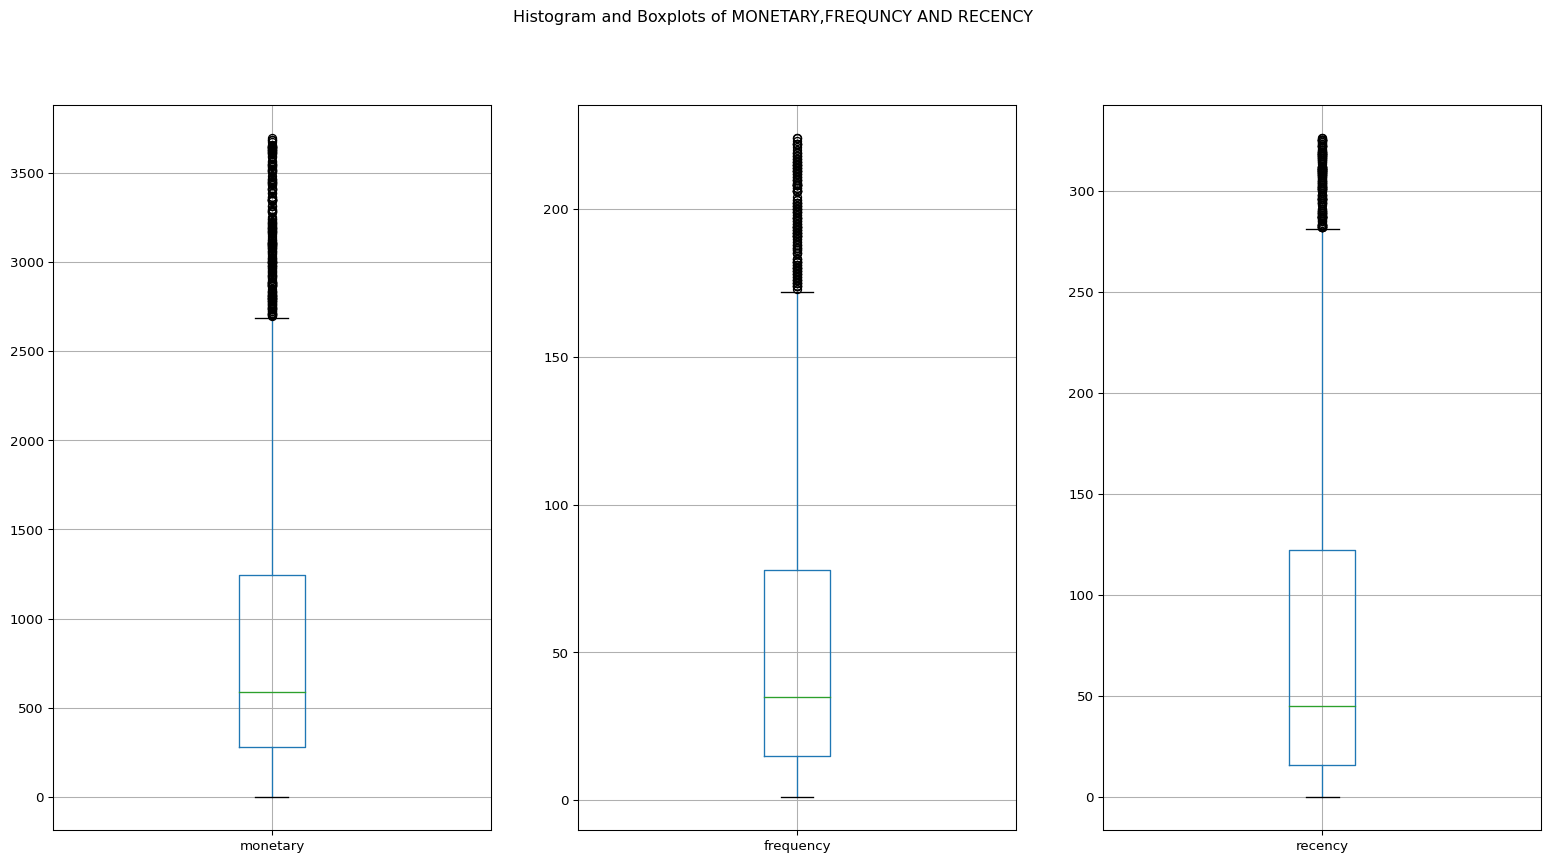

In [ ]:
# Obtain the boxplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10), dpi = 96, sharey = False)

# Construct Boxplot for 'Monetary'
Monetary_continous.boxplot(column='monetary',ax=axes[0])
# Construct Boxplot for 'Frequency'
frequency_continous.boxplot(column='frequency',ax=axes[1])
# Construct Boxplot for 'Recency'
recency_continous.boxplot(column='recency',ax=axes[2])

fig.suptitle('Histogram and Boxplots of MONETARY,FREQUNCY AND RECENCY')
plt.show()

**Q**: Write your observatoions from the above plot.

**A**:

In [ ]:
# Normalise the RFM parameters
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from  sklearn.metrics import silhouette_score
scaler = StandardScaler()
rfm_normalized =Monetary_continous[['monetary','frequency','recency']]
rfm_normalized1 = rfm_normalized
rfm_normalized1

,monetary,frequency,recency
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,2506.04,85,35
6,89.00,4,203
...,...,...,...
4334,180.60,10,277
4335,80.82,7,180
4336,178.05,12,7
4337,2094.88,756,3


In [ ]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized =pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,1.099421,-0.394646,-0.244806
1,1.051512,0.148701,-0.796176
2,-0.666340,-0.575761,2.068980
3,1.954997,0.303943,-0.628796
4,-0.962557,-0.743940,1.025315
...,...,...,...
3907,-0.851989,-0.666319,1.753911
3908,-0.972431,-0.705130,0.798859
3909,-0.855067,-0.640446,-0.904481
3910,1.458695,8.984552,-0.943865


Again create histograms for `Monetary`, `Frequency` and `Recency` columns to check whether all of them have similar mean and variance after standardisation.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa706d4d410>],
      dtype=object)

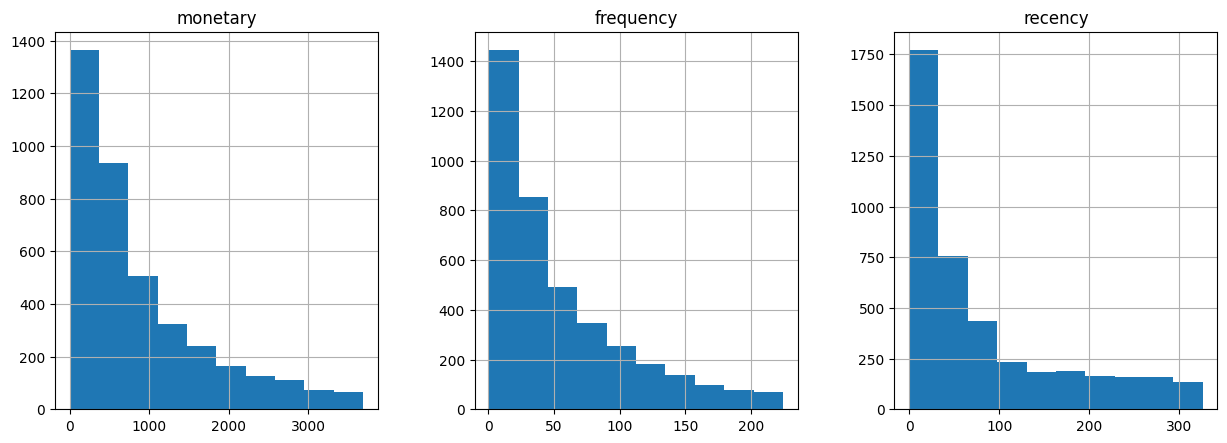

In [ ]:
# Obtain the histograms.
fig,axes3=plt.subplots(nrows=1,ncols=3,figsize=(15,5),dpi=100)
# Construct Histogram for 'Monetary'
Monetary_continous.hist(column='monetary',ax=axes3[0])
# Construct Histogram for 'Frequency'
frequency_continous.hist(column='frequency',ax=axes3[1])
# Construct Histogram for 'Recency'
recency_continous.hist(column='recency',ax=axes3[2])

You may note that all the columns now have same mean and variance. Now our dataframe is ready for K-Means clustering.

---

#### Applying K-Means clustering

Start by finding the optimal number of clusters for the K-Means algorithm. We will use the elbow method.

Recall the steps for Elbow method:
1. Compute K-Means clustering for different values of `K` by varying `K` from `1` to `10` clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS) using `inertia_` attribute of `KMeans` object.
3. Plot the curve of WCSS vs the number of clusters `K`.


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from  sklearn.metrics import silhouette_score

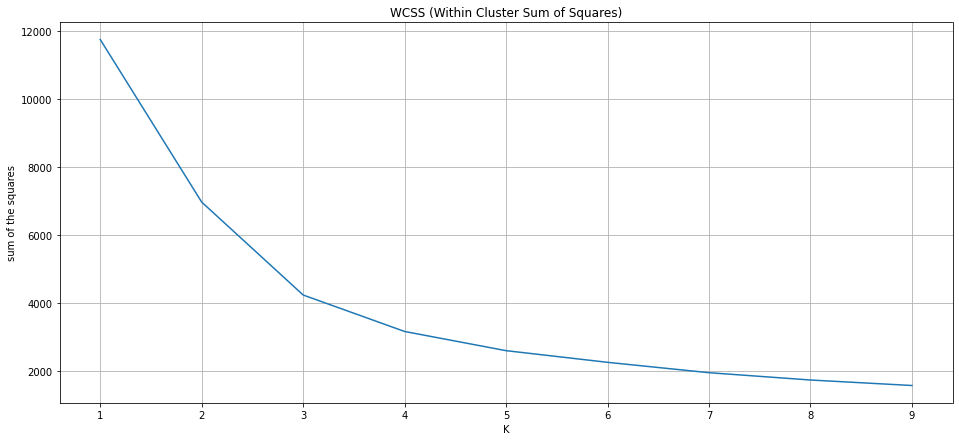

In [ ]:
# Determine 'K' using Elbow method.
wcss = []
# Initiate a for loop that ranges from 1 to 10.
clusters = range(1, 10)
# Plot WCSS vs number of clusters.
for k in clusters :
   kmeans = KMeans(n_clusters = k, random_state = 10)
   kmeans.fit(rfm_normalized)
   wcss.append(kmeans.inertia_)
wcss_data = pd.DataFrame({'Clusters': clusters, 'WCSS': wcss})
wcss_data
plt.figure(figsize=(16,7))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(clusters, wcss)
plt.xlabel("K")
plt.ylabel("sum of the squares")
plt.grid()
plt.xticks(range(1,10))
plt.show()

**Q**: What is the optimal number of clusters?

**A**: 8


In [ ]:
# Clustering the dataset
rfm_normalized1['Cluster labels']=kmeans.labels_
rfm_normalized1

,monetary,frequency,recency,Cluster labels
2,1797.24,31,74,5
3,1757.55,73,18,5
4,334.40,17,309,0
5,2506.04,85,35,2
6,89.00,4,203,7
...,...,...,...,...
4334,180.60,10,277,0
4335,80.82,7,180,7
4336,178.05,12,7,1
4337,2094.88,756,3,6


In [ ]:
# Create a dataframe with cluster labels for cluster visualisation
import plotly.express as px
fig = px.scatter_3d(rfm_normalized1, x='monetary', y='frequency',z='recency',color='Cluster labels')
fig.show()


Display those clusters using `scatter_3d()` function from `plotly.express` module.

In [ ]:
# Visualise the clusters for customer segmentation


**Summarising clusters:**

Calculate the mean recency, frequency and monetary values of all the clusters by applying `agg()` function on `km_df` dataframe.

In [ ]:
# Understanding the Cluster Distribution
import numpy as np
rfm_normalized1.agg(np.average)

monetary          886.427887
frequency          61.505624
recency            98.863753
Cluster labels      3.793967
dtype: float64

**Q**: Write your observations from the clusters.

**A**: There are EIGHT CLUSTERS FORMED, which says that there are eight group of customers having similar kind of purcahsing behaviour.

---

## **Report**

Create a brief final report which explains all the useful insights you got from this project in a document or powerpoint.

Submit the report along with the project.

---